In [60]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy.optimize as sp

rc('text', usetex=True)
rc('font', size=16)

In [61]:
def savepdf_tex(fig, name, **kwargs):
    import subprocess, os
    fig.savefig("temp.svg", format="svg", **kwargs)
    incmd = ["inkscape", "temp.svg", "--export-pdf={}.pdf".format(name),
             "--export-latex"] #"--export-ignore-filters",
    subprocess.check_output(incmd)
    os.remove("temp.pdf")

In [62]:
def ax_b(x, a, b):
    return a * np.power(x, b)

[7000, 10000, 20000, 9000, 8000, 4000, 5000, 1000, 6000, 3000, 2000] [317580.5, 658971.0, 2837998.0, 531888.5, 407721.0, 106490.5, 194189.5, 10727.0, 246526.5, 60099.0, 32890.0]
[0.00320642 2.08010356]



(inkscape:25223): Gtk-WARNING **: 18:17:44.441: Theme parsing error: gtk-contained-dark.css:2871:228: Missing closing bracket for :not()


FileNotFoundError: [Errno 2] No such file or directory: 'temp.pdf'

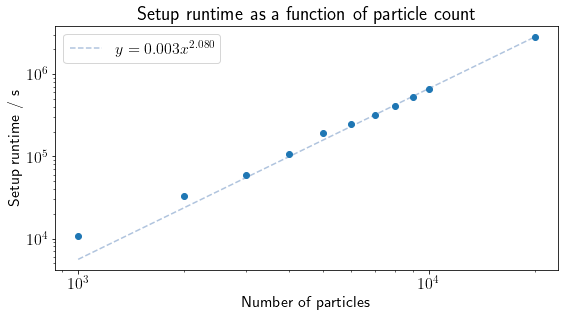

In [63]:
fig = plt.figure(figsize=(9, 4.5))

files = glob.glob("../data/1*")
x = []
y = []

for f in files:
    n = int(f[20:-8])
    arr = np.loadtxt(f)
    x.append(n)
    y.append(np.median(arr))

print(x, y)

label = "$y = %.3fx^{%.3f}$"% (popt[0], popt[1])

popt, pcov = sp.curve_fit(ax_b, x, y, p0=[1, 2])
plt.plot([1000, 20000], ax_b([1000, 20000], popt[0], popt[1]), 
    linestyle='dashed',
    label=label,
    color='lightsteelblue')

plt.xlabel("Number of particles")
plt.ylabel("Setup runtime / s")
plt.title("Setup runtime as a function of particle count")

plt.scatter(x, y, zorder=100)


print(popt)

plt.loglog()
plt.legend()

savepdf_tex(fig, "density_time")